# Euro24

# Intro

The goal of this project is to analyze Euro24 dataset.The dataset contains information about players participating in Euro 2024, including their names, positions, ages, clubs, heights, preferred foot, number of caps (appearances), goals, market value, and country. Detailed Goals:
- Player Performance Analysis
- Team and Country Analysis
- General Insights and Pattterns


The project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis. Here are a few questions that this project has sought to answer:
Questions to Answer

    Who are the top 10 most valuable players in the tournament?
    What is the average age and market value of players in different positions?
    Which clubs are sending the most players to the tournament?
    How does the number of caps a player has correlate with their market value?
    Which countries have the highest average market value per player?

By focusing on these goals and questions, the analysis can provide valuable insights into player performance, team compositions, market trends, and potential recruitment targets.


## Import Libraries and Load Data 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("euro2024_players.csv")

## Inspect

In [3]:
df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [4]:
df.shape

(623, 10)

In [5]:
df.columns

Index(['Name', 'Position', 'Age', 'Club', 'Height', 'Foot', 'Caps', 'Goals',
       'MarketValue', 'Country'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [7]:
df['Foot'] = df['Foot'].fillna('right')

There are 3 missing values in the 'Foot' column replaced with the 'right' alue.

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
618    False
619    False
620    False
621    False
622    False
Length: 623, dtype: bool

No duplicate rows.

## Initial  Analysis and Vizualizations

In [9]:
df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


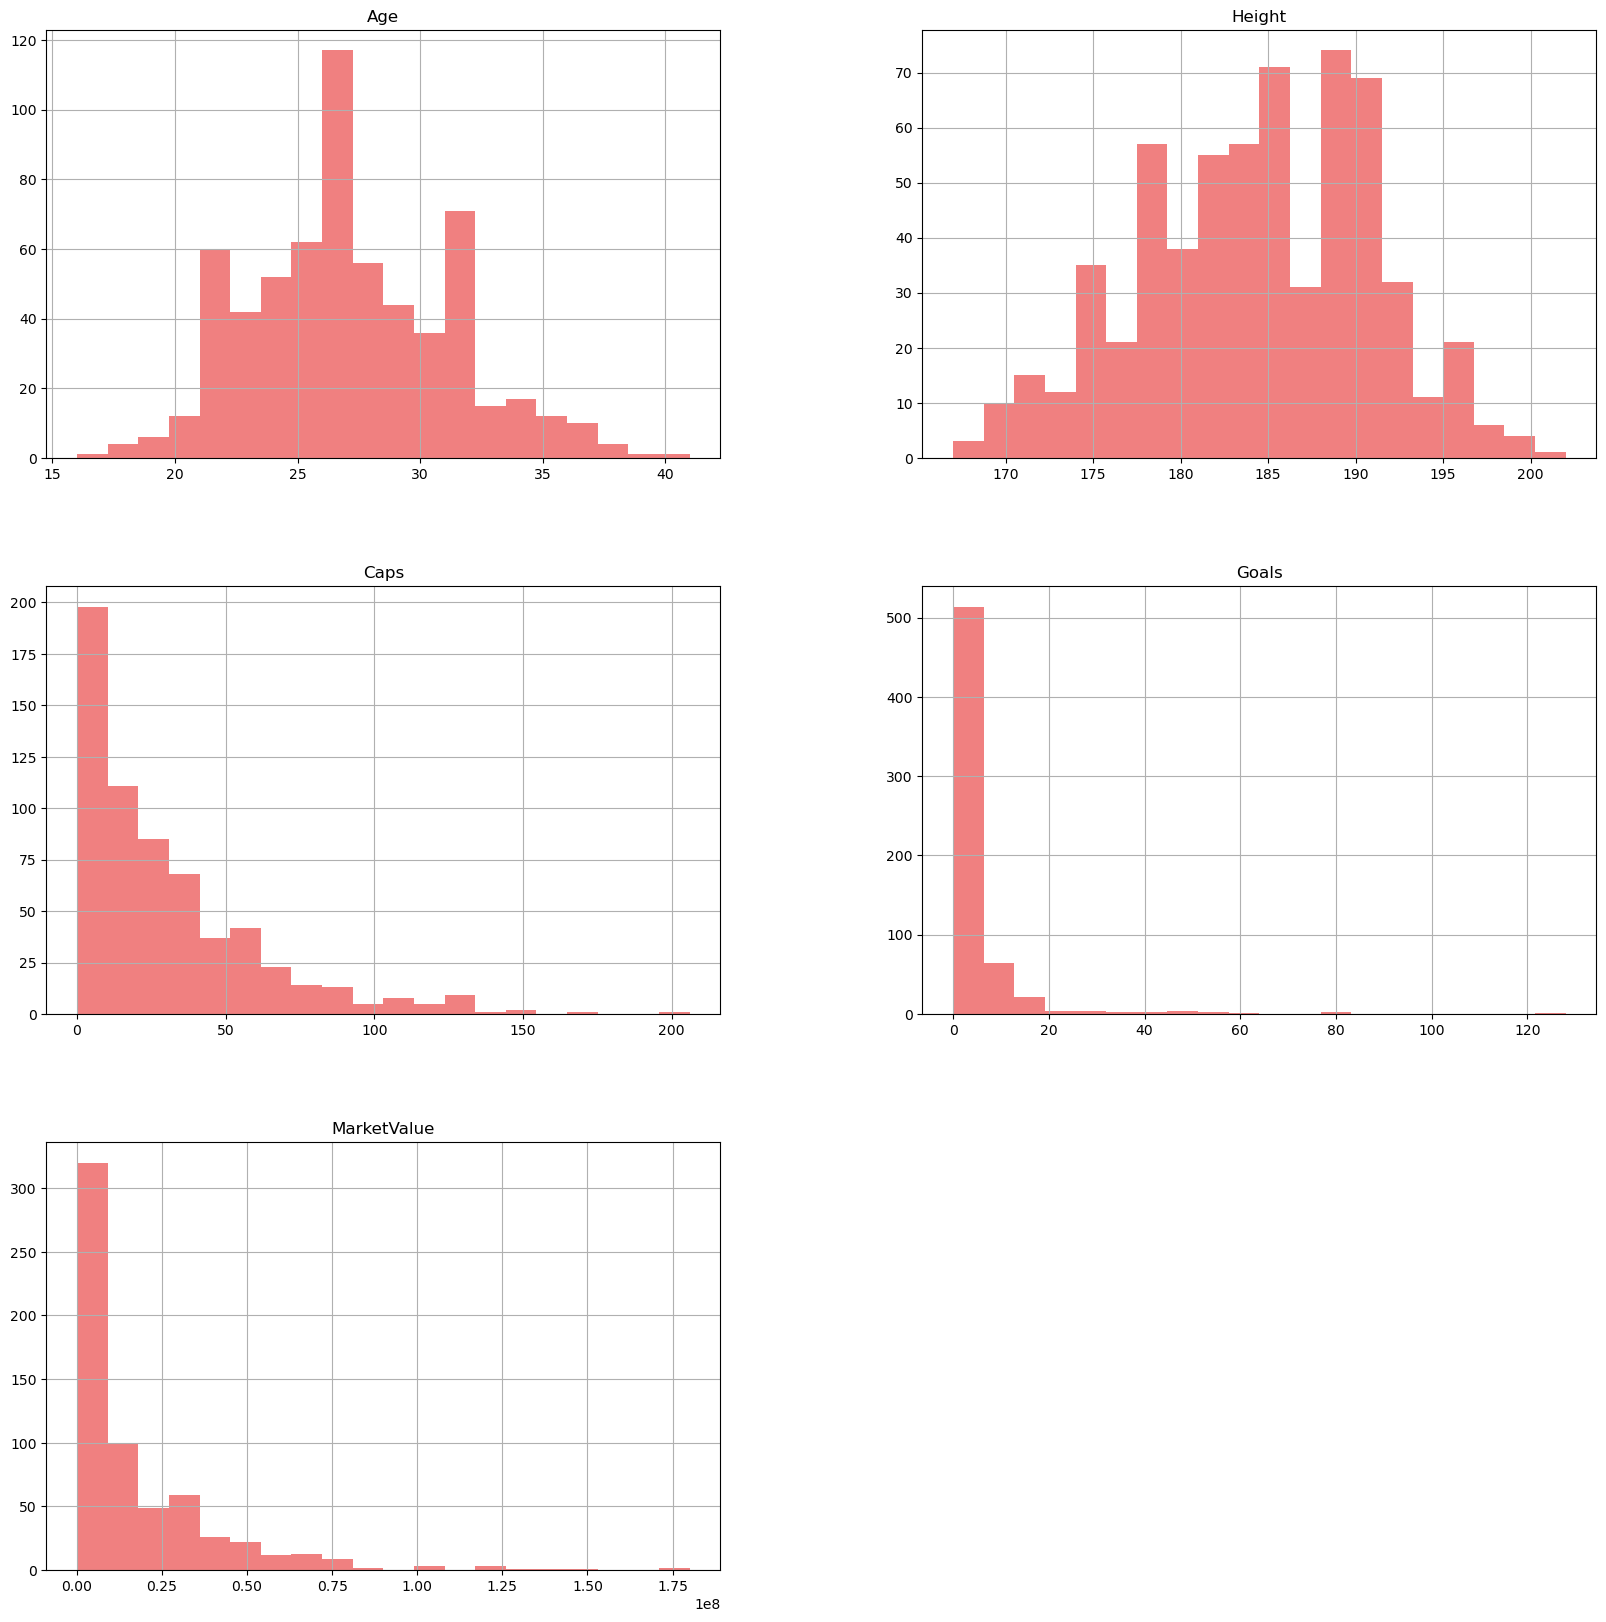

In [10]:
# Create subplots
df.hist(bins = 20, figsize = (20,20), color = 'lightcoral')
plt.show()

## Players Analysis

### Identify Key Players 

In [11]:
# Find the players with the highest market value
top_market_value_players = df.sort_values(by='MarketValue', ascending=False).head(10)

# Display the top 10 players by market value
print(top_market_value_players[['Name', 'MarketValue']])

                  Name  MarketValue
250    Jude Bellingham    180000000
411      Kylian Mbappé    180000000
254         Phil Foden    150000000
255        Bukayo Saka    140000000
17       Florian Wirtz    130000000
115              Rodri    120000000
246        Declan Rice    120000000
18       Jamal Musiala    120000000
404  Eduardo Camavinga    100000000
257         Harry Kane    100000000


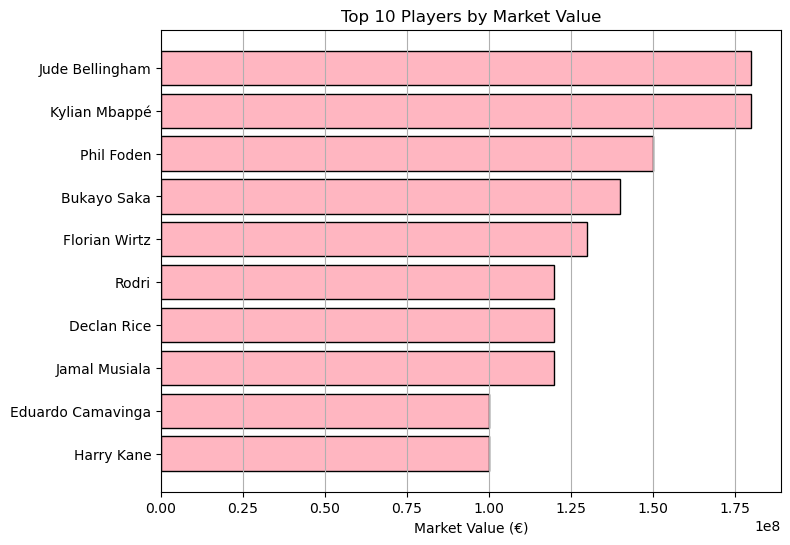

In [12]:
# Plot the top 10 players by market value
plt.figure(figsize=(8, 6))
plt.barh(top_market_value_players['Name'], top_market_value_players['MarketValue'], color='lightpink', edgecolor='black')
plt.xlabel('Market Value (€)')
plt.title('Top 10 Players by Market Value')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.grid(axis='x')
plt.show()

In [13]:
# Find the players with the highest number of goals
top_goals_players = df.sort_values(by='Goals', ascending=False).head(10)

# Display the top 10 players by goals
print(top_goals_players[['Name', 'Goals']])

                    Name  Goals
596    Cristiano Ronaldo    128
440        Romelu Lukaku     83
335   Robert Lewandowski     82
257           Harry Kane     63
415       Olivier Giroud     57
309  Aleksandar Mitrovic     57
411        Kylian Mbappé     47
515    Andriy Yarmolenko     46
22         Thomas Müller     45
363        Memphis Depay     45


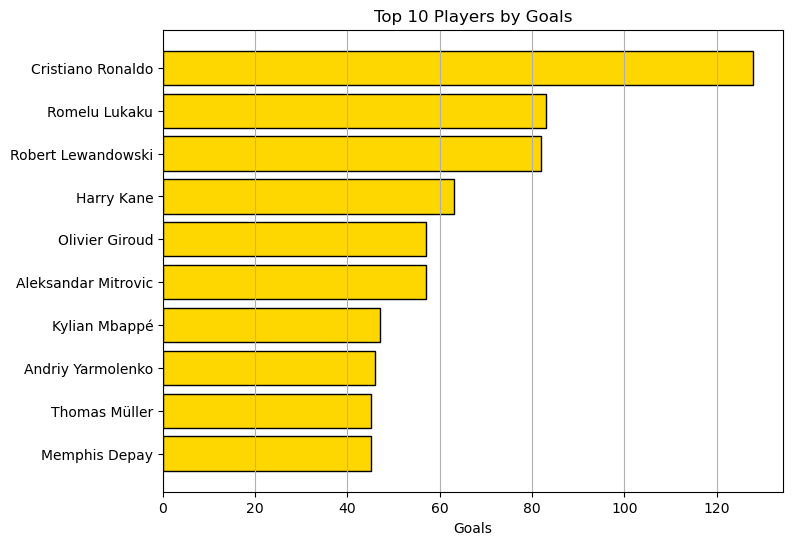

In [14]:
# Plot the top 10 players by goals
plt.figure(figsize=(8, 6))
plt.barh(top_goals_players['Name'], top_goals_players['Goals'], color='gold', edgecolor='black')
plt.xlabel('Goals')
plt.title('Top 10 Players by Goals')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.grid(axis='x')
plt.show()

In [15]:
# Find the players with the highest number of caps
top_caps_players = df.sort_values(by='Caps', ascending=False).head(10)

# Display the top 10 players by caps
print(top_caps_players[['Name', 'Caps']])

                   Name  Caps
596   Cristiano Ronaldo   206
145         Luka Modric   174
423      Jan Vertonghen   154
335  Robert Lewandowski   149
577                Pepe   136
415      Olivier Giroud   132
422         Axel Witsel   131
266          Simon Kjær   131
151        Ivan Perisic   130
22        Thomas Müller   129


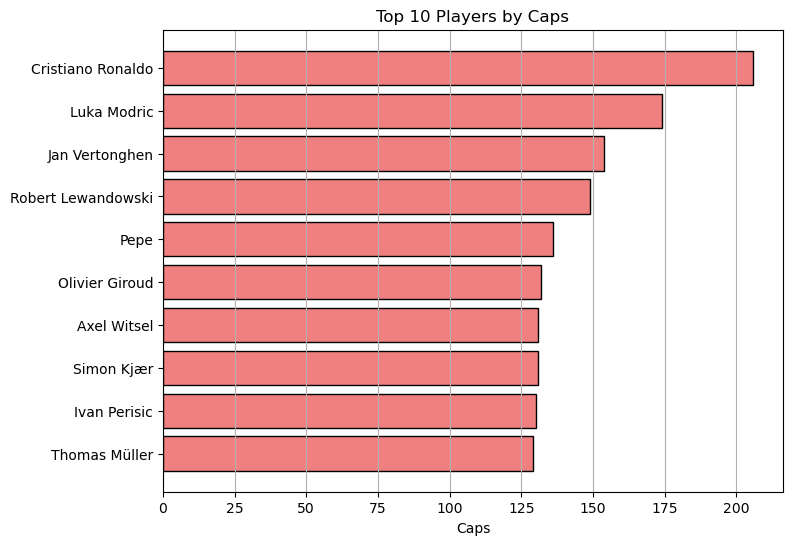

In [16]:
# Plot the top 10 players by caps
plt.figure(figsize=(8, 6))
plt.barh(top_caps_players['Name'], top_caps_players['Caps'], color='lightcoral', edgecolor='black')
plt.xlabel('Caps')
plt.title('Top 10 Players by Caps')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.grid(axis='x')
plt.show()

### Age and Performance

In [17]:
# Calculate correlations
correlation_age_market_value = df['Age'].corr(df['MarketValue'])
correlation_age_goals = df['Age'].corr(df['Goals'])
correlation_age_caps = df['Age'].corr(df['Caps'])


print(f'Correlation between Age and Market Value: {correlation_age_market_value}')
print(f'Correlation between Age and Goals: {correlation_age_goals}')
print(f'Correlation between Age and Caps: {correlation_age_caps}')

Correlation between Age and Market Value: -0.3310673639344214
Correlation between Age and Goals: 0.3101442350703538
Correlation between Age and Caps: 0.6428287578307972


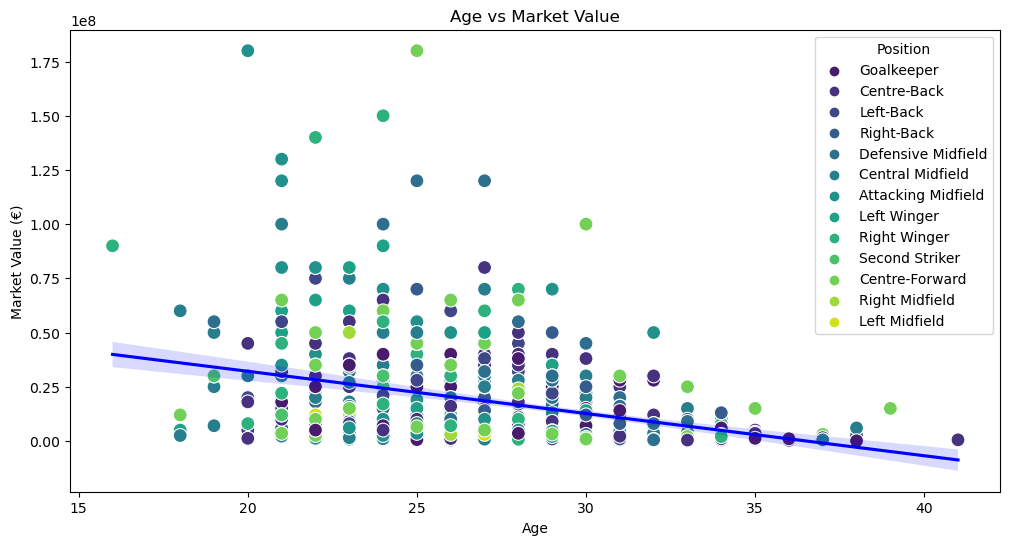

In [18]:
# Scatter plot for Age vs Market Value
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Age'], y=df['MarketValue'], hue=df['Position'], palette='viridis', s=100)
sns.regplot(x='Age', y='MarketValue', data=df, scatter=False, color='blue')
plt.title('Age vs Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value (€)')
plt.show()

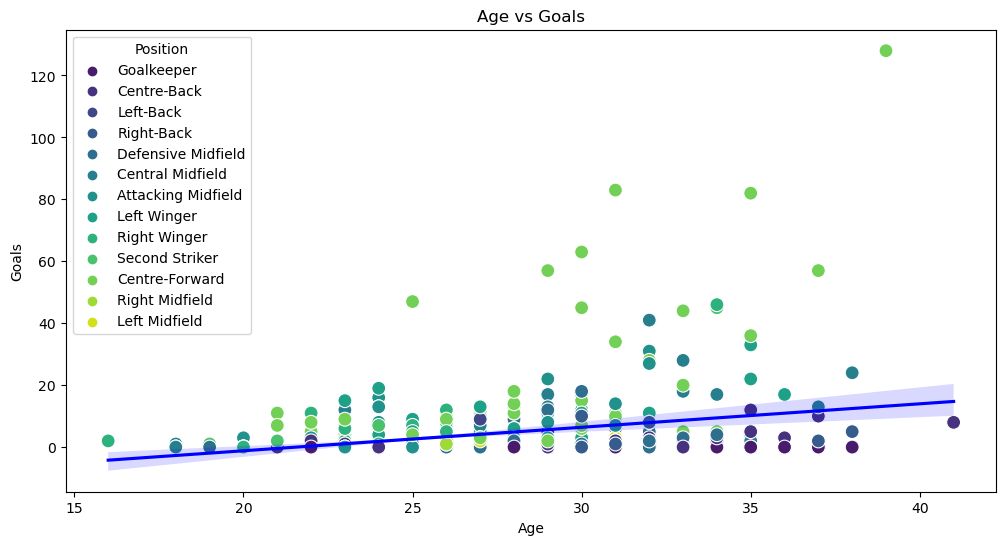

In [19]:
# Scatter plot for Age vs Goals
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Age'], y=df['Goals'], hue=df['Position'], palette='viridis', s=100)
sns.regplot(x='Age', y='Goals', data=df, scatter=False, color='blue')
plt.title('Age vs Goals')
plt.xlabel('Age')
plt.ylabel('Goals')
plt.show()

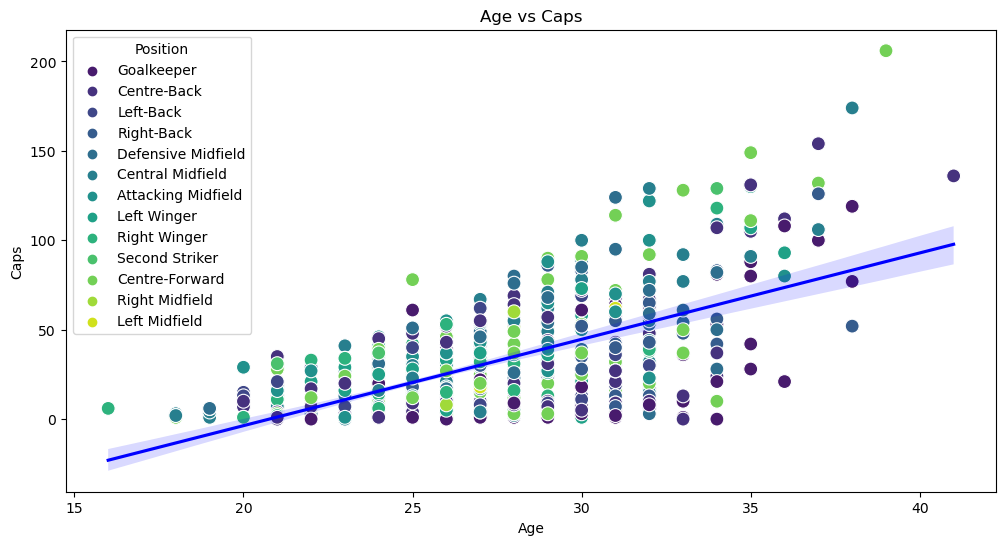

In [20]:
# Scatter plot for Age vs Caps
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['Age'], y=df['Caps'], hue=df['Position'], palette='viridis', s=100)
sns.regplot(x='Age', y='Caps', data=df, scatter=False, color='blue')
plt.title('Age vs Caps')
plt.xlabel('Age')
plt.ylabel('Caps')
plt.show()

## Team and Country Analysis 

In [21]:
# Find the countries' players market value
country_marketValue = df.groupby(by='Country')['MarketValue'].sum().reset_index()
country_marketValue.sort_values(by='MarketValue',ascending=False,inplace=True)

# Display the countries and its players market value
print(country_marketValue[['Country', 'MarketValue']])

           Country  MarketValue
6          England   1515000000
7           France   1234000000
14        Portugal   1054500000
20           Spain    965500000
9          Germany    851000000
12     Netherlands    845000000
11           Italy    705500000
2          Belgium    584500000
5          Denmark    415500000
23         Ukraine    379000000
3          Croatia    327700000
22         Turkiye    324100000
17          Serbia    311800000
21     Switzerland    282000000
1          Austria    235500000
13          Poland    212400000
16        Scotland    207400000
4   Czech Republic    193900000
10         Hungary    164450000
8          Georgia    160150000
18        Slovakia    156700000
19        Slovenia    139500000
0          Albania    111600000
15         Romania     92125000


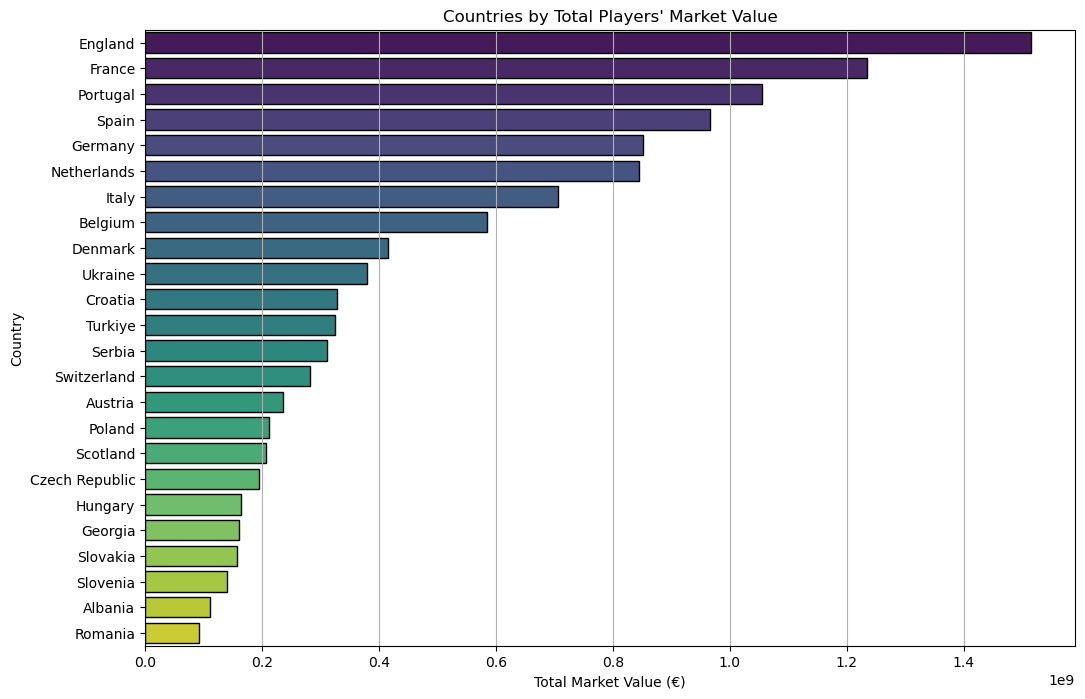

In [22]:
# Plot the participating countries by players market value
plt.figure(figsize=(12, 8))
sns.barplot(x='MarketValue', y='Country', data=country_marketValue, palette='viridis', edgecolor='black')
plt.xlabel('Total Market Value (€)')
plt.title('Countries by Total Players\' Market Value')
plt.grid(axis='x')
plt.show()

In [23]:
# Total Goals by Country
total_goals_by_country = df.groupby('Country')['Goals'].sum().sort_values(ascending=False).reset_index()
total_goals_by_country.sort_values(by='Goals', ascending=False, inplace=True)

print(total_goals_by_country[['Country', 'Goals']])

           Country  Goals
0         Portugal    225
1           France    192
2          Belgium    177
3           Poland    154
4          Croatia    147
5      Netherlands    141
6          Denmark    135
7          Germany    134
8           Serbia    129
9      Switzerland    125
10         Ukraine    114
11         England    100
12           Spain     95
13         Austria     93
14        Slovenia     78
15         Turkiye     71
16        Slovakia     67
17  Czech Republic     65
18         Georgia     64
19         Romania     63
20         Hungary     60
21           Italy     59
22        Scotland     59
23         Albania     40


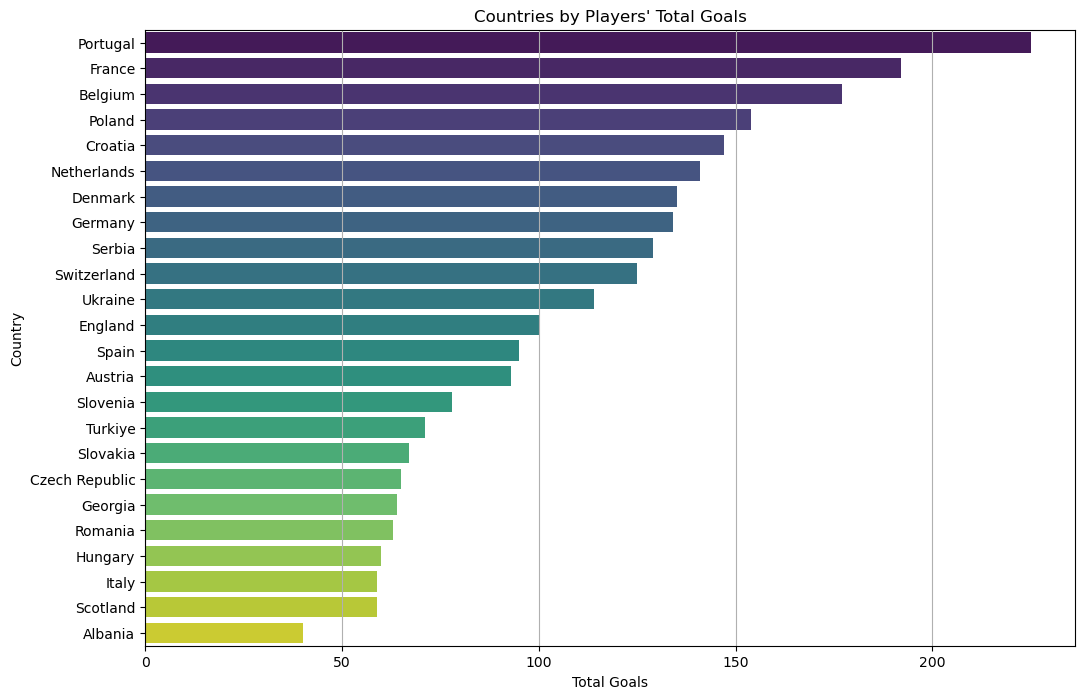

In [24]:
# Plot the total goals by country
plt.figure(figsize=(12, 8))
sns.barplot(x='Goals', y='Country', data=total_goals_by_country, palette='viridis')
plt.xlabel('Total Goals')
plt.title('Countries by Players\' Total Goals')
plt.grid(axis='x')
plt.show()

In [25]:
# Total Caps by Country
total_caps_by_country = df.groupby('Country')['Caps'].sum().sort_values(ascending=False).reset_index()
total_caps_by_country.sort_values(by='Caps', ascending=False, inplace=True)

print(total_caps_by_country[['Country', 'Caps']])



           Country  Caps
0          Croatia  1152
1         Portugal  1113
2      Switzerland  1092
3          Denmark  1071
4          Belgium   949
5          Germany   906
6         Slovakia   862
7           Serbia   860
8          Ukraine   849
9      Netherlands   838
10          France   836
11          Poland   825
12        Slovenia   771
13         Hungary   750
14         Georgia   750
15         Albania   679
16         England   651
17        Scotland   643
18         Turkiye   632
19         Austria   613
20         Romania   590
21           Spain   535
22           Italy   529
23  Czech Republic   405


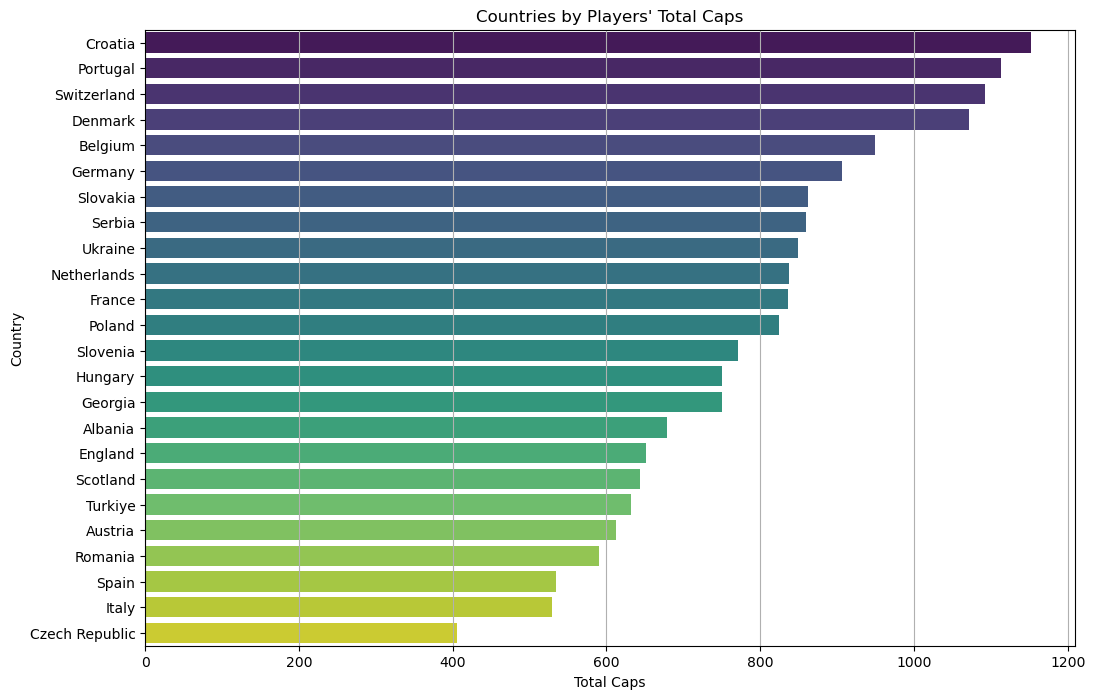

In [26]:
# Plot the total caps by country
plt.figure(figsize=(12, 8))
sns.barplot(x='Caps', y='Country', data=total_caps_by_country, palette='viridis')
plt.xlabel('Total Caps')
plt.title('Countries by Players\' Total Caps')
plt.grid(axis='x')
plt.show()

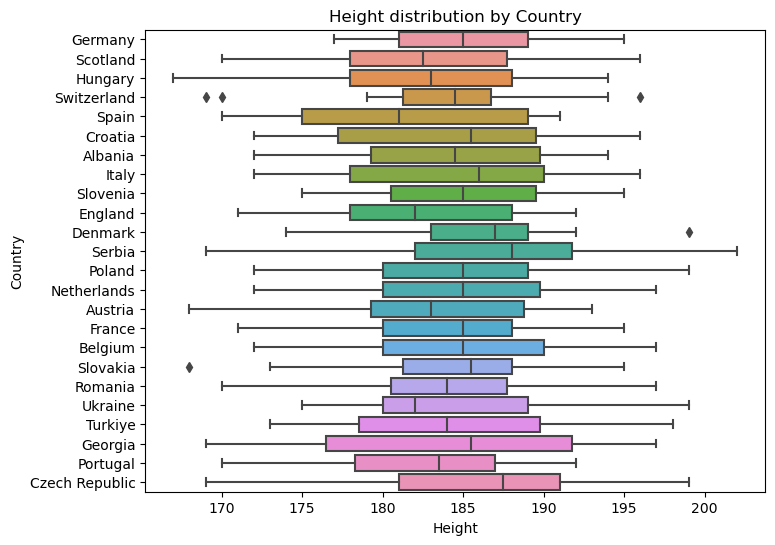

In [27]:
# Plot Height v Country
plt.figure(figsize=(8,6))
sns.boxplot(df, x='Height', y='Country')
plt.title('Height distribution by Country')
plt.show()

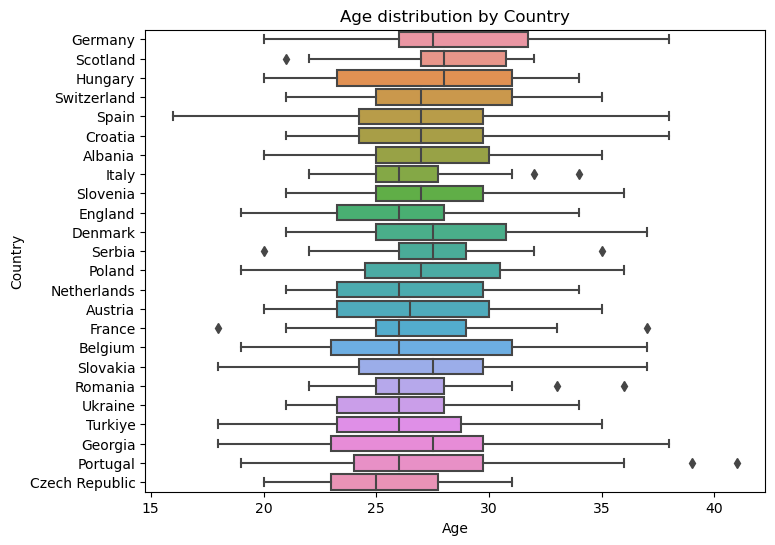

In [28]:
# Plot Age v Country
plt.figure(figsize=(8,6))
sns.boxplot(df, x='Age', y='Country')
plt.title('Age distribution by Country')
plt.show()

In [29]:
# Group by club and count the number of players
club_counts = df['Club'].value_counts().reset_index()
club_counts.columns = ['Club', 'PlayerCount']

In [30]:
club_counts.sort_values(by='PlayerCount', ascending=False, inplace=True)

In [31]:
top_clubs = club_counts.head(10)
print(top_clubs)

                  Club  PlayerCount
0      Manchester City           13
1          Inter Milan           13
2         FC Barcelona           12
3          Real Madrid           12
4  Paris Saint-Germain           12
5           RB Leipzig           11
6        Bayern Munich           11
7  Bayer 04 Leverkusen           10
8           Arsenal FC           10
9         Liverpool FC            9


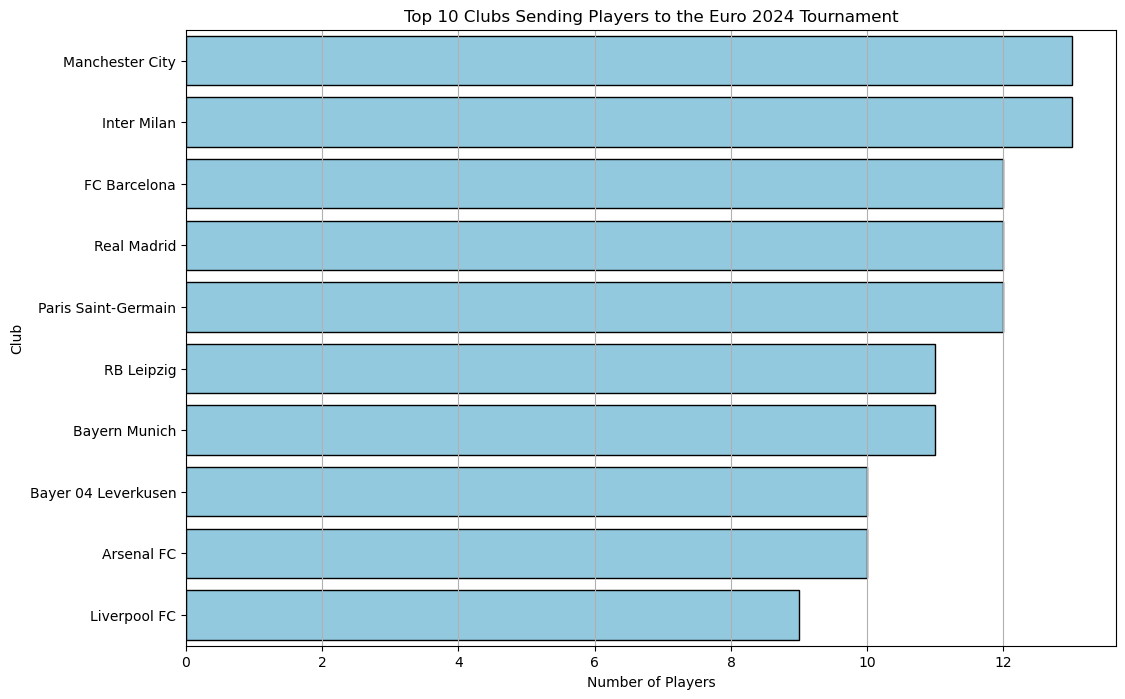

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x='PlayerCount', y='Club', data=top_clubs, color='skyblue', edgecolor='black')
plt.xlabel('Number of Players')
plt.title('Top 10 Clubs Sending Players to the Euro 2024 Tournament')
plt.grid(axis='x')
plt.show()

## General Insights and Patterns

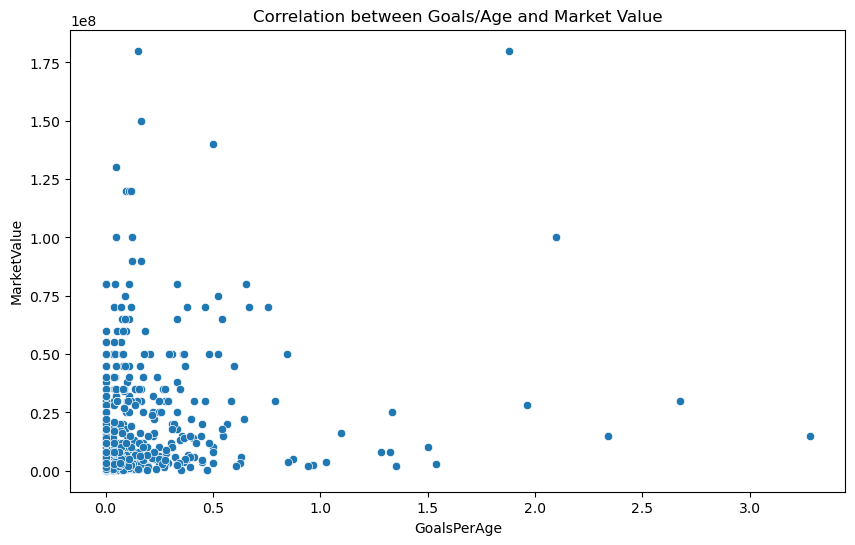

In [33]:
# Calculate Goals per Age
df['GoalsPerAge'] = df['Goals'] / df['Age']

# Scatter plot for GoalsPerAge vs MarketValue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GoalsPerAge', y='MarketValue')
plt.title('Correlation between Goals/Age and Market Value')
plt.show()



Correlation between Height and Market Value: -0.0709833376522987
Correlation between Height and Goals: -0.018784965333945837
Correlation between Height and Caps: -0.051479409070671764


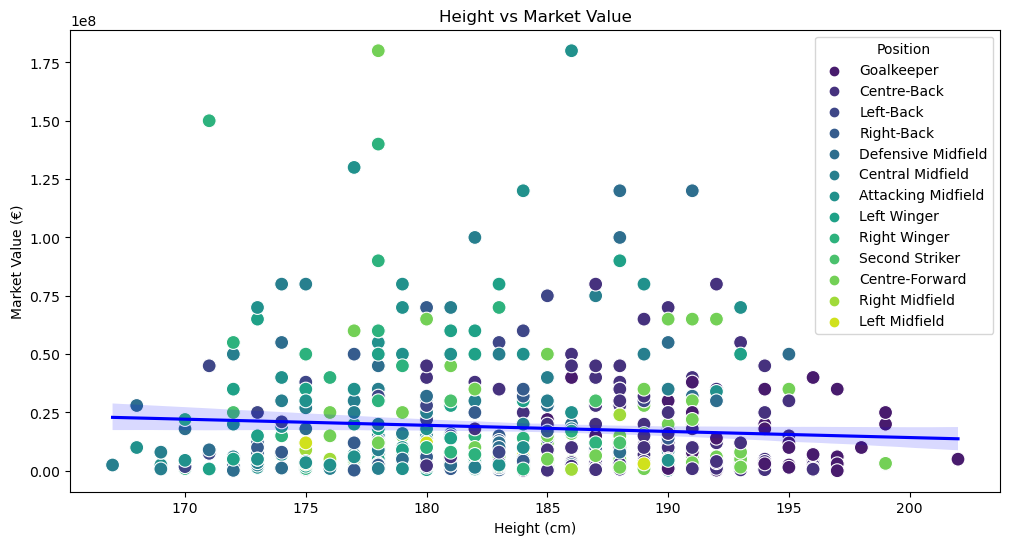

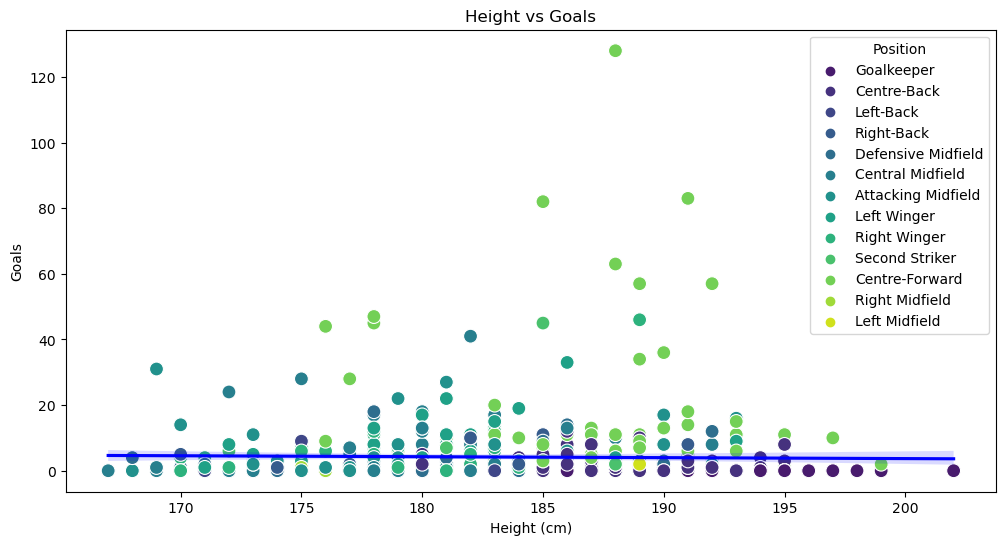

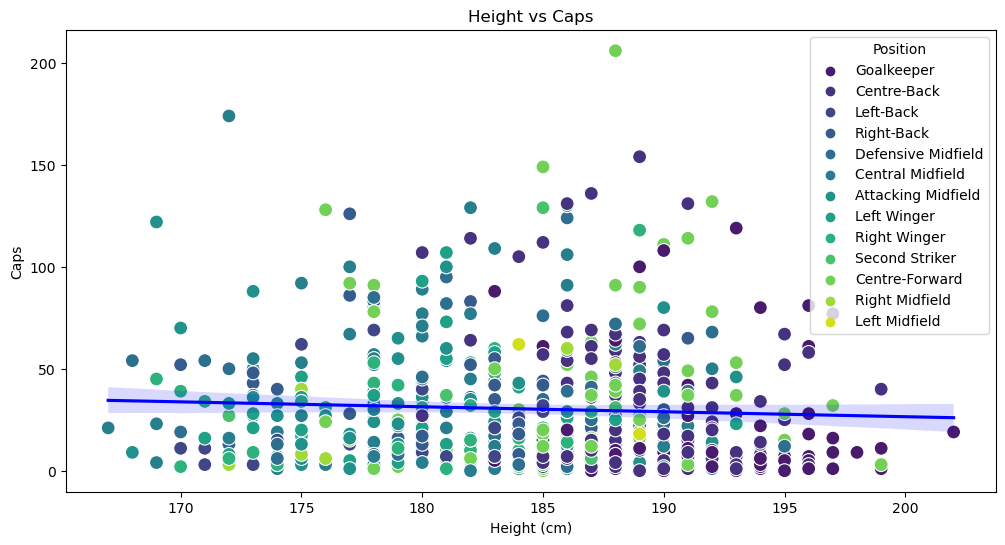

In [34]:
correlation_height_market_value = df['Height'].corr(df['MarketValue'])
correlation_height_goals = df['Height'].corr(df['Goals'])
correlation_height_caps = df['Height'].corr(df['Caps'])

print(f'Correlation between Height and Market Value: {correlation_height_market_value}')
print(f'Correlation between Height and Goals: {correlation_height_goals}')
print(f'Correlation between Height and Caps: {correlation_height_caps}')

# Scatter plot for Height vs Market Value
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Height', y='MarketValue', data=df, hue='Position', palette='viridis', s=100)
sns.regplot(x='Height', y='MarketValue', data=df, scatter=False, color='blue')
plt.title('Height vs Market Value')
plt.xlabel('Height (cm)')
plt.ylabel('Market Value (€)')
plt.show()

# Scatter plot for Height vs Goals
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Height', y='Goals', data=df, hue='Position', palette='viridis', s=100)
sns.regplot(x='Height', y='Goals', data=df, scatter=False, color='blue')
plt.title('Height vs Goals')
plt.xlabel('Height (cm)')
plt.ylabel('Goals')
plt.show()

# Scatter plot for Height vs Caps
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Height', y='Caps', data=df, hue='Position', palette='viridis', s=100)
sns.regplot(x='Height', y='Caps', data=df, scatter=False, color='blue')
plt.title('Height vs Caps')
plt.xlabel('Height (cm)')
plt.ylabel('Caps')
plt.show()

In [35]:
# Calculate Position by Market Value
marketValue_by_position = df.groupby('Position')['MarketValue'].mean().reset_index()
marketValue_by_position.sort_values(by='MarketValue', ascending=False, inplace=True)

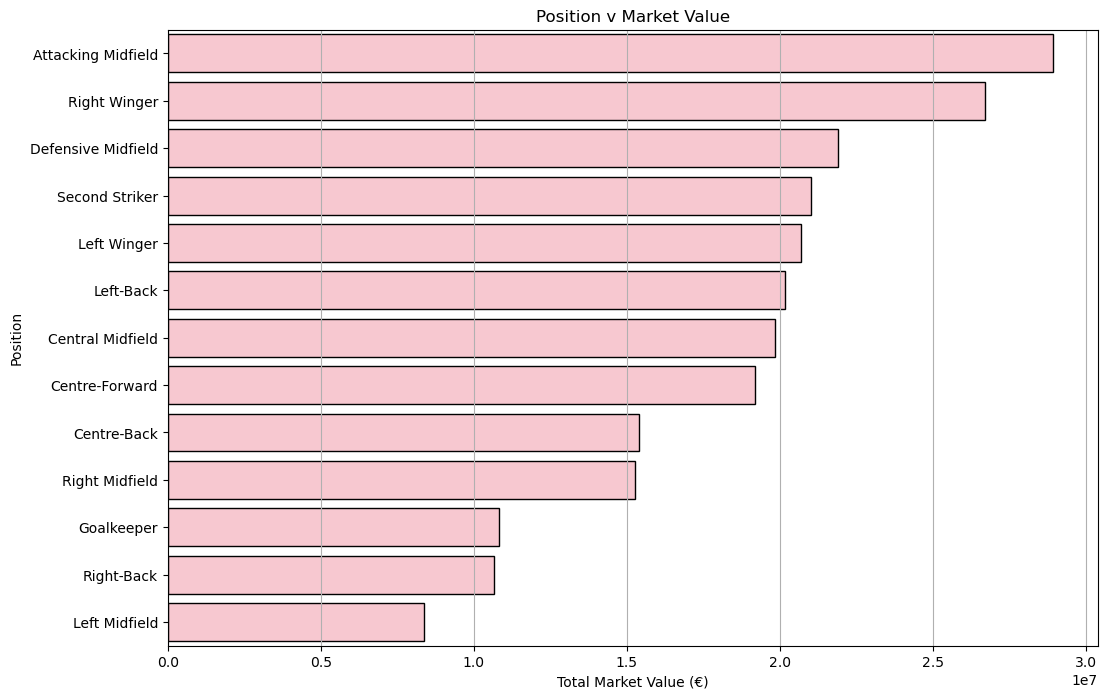

In [36]:
# Barplot for Position v Market Value
plt.figure(figsize=(12, 8))
sns.barplot(x='MarketValue', y='Position', data=marketValue_by_position, color='pink', edgecolor='black', errorbar=None)
plt.xlabel('Total Market Value (€)')
plt.title('Position v Market Value')
plt.grid(axis='x')
plt.show()

In [37]:
# Calculate Position by Age
age_by_position = df.groupby('Position')['Age'].mean().reset_index()
age_by_position.sort_values(by='Age', ascending=False, inplace=True)

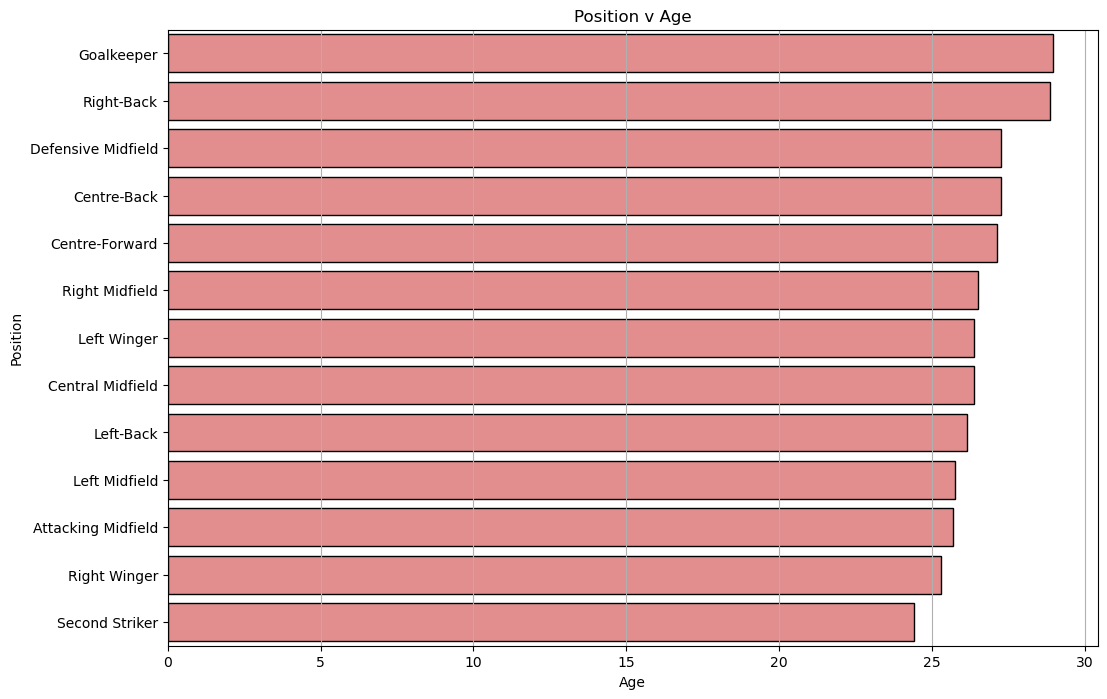

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Position', data=age_by_position, color='lightcoral', edgecolor='black', errorbar=None)
plt.xlabel('Age')
plt.title('Position v Age')
plt.grid(axis='x')
plt.show()

In [39]:
# Calculate Position by Height
height_by_position = df.groupby('Position')['Height'].mean().reset_index()
height_by_position.sort_values(by='Height', ascending=False, inplace=True)

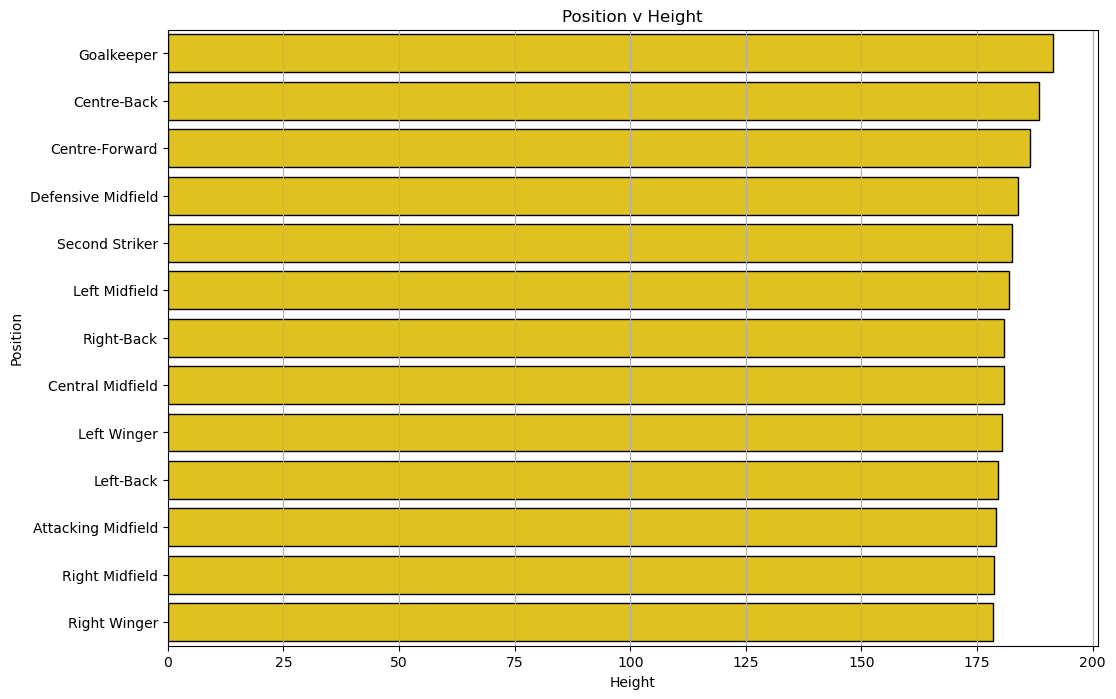

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Height', y='Position', data=height_by_position, color='gold', edgecolor='black', errorbar=None)
plt.xlabel('Height')
plt.title('Position v Height')
plt.grid(axis='x')
plt.show()

# Conclusions and Insights

### Missing Values:
The "Foot" column has 3 missing values. 


###  Data Types: 
The data types are appropriate for the respective columns.


### Summary Statistics:
- The dataset contains 623 players.
- The "Position" column has 13 unique positions with "Centre-Back" being the most common.
- The "Club" column has 219 unique clubs with "Manchester City" having the most players (13).
- Players' ages range from 16 to 41 with a mean age of approximately 27.
- Heights range from 167 cm to 202 cm with a mean height of approximately 184 cm.
- The "Caps" (appearances) range from 0 to 206 with a mean of approximately 30.
- The number of goals ranges from 0 to 128 with a mean of about 4.
- Market values range from €50,000 to €180,000,000 with a mean of approximately €18,409,030.
- There are 24 unique countries with Poland having the highest representation (27 players).